In [1]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.animation as animation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import time
from itertools import product, combinations
from matplotlib.patches import Rectangle, PathPatch

In [2]:
mesh_size_x = 200
y_multiplier = 1
mesh_size_y = mesh_size_x * y_multiplier
frame_number = 240
fps = 60
distance = 50 # of the field
field_x = [-distance/2, distance/2]
# field_y = [i * y_multiplier for i in field_x]
field_y = [0, distance * y_multiplier ]
d_slits = 50
n_slits = 1
thickness = 1

barrier_x = int(mesh_size_y / 2)
barrier_y = int(mesh_size_y)
barrier_y_stop = int(mesh_size_x / 2) - int((d_slits / 2) * mesh_size_x / (np.abs(field_x[0]) + np.abs(field_x[1])))
barrier_y_stop2 = int(mesh_size_x / 2) + int((d_slits / 2) * mesh_size_x / (np.abs(field_x[0]) + np.abs(field_x[1])))


def f(x, y, mult=1, t=0, v=10, trig='sin', power=2, n_slits=n_slits, d_slits=d_slits):
    sum_ = 0
    start_d = -1 * d_slits*n_slits/2
    edges = [start_d + d_slits * i for i in range(0, n_slits+1)]
    for edge in edges:
        x_ = x + edge
        for thicc in range(0, thickness):
            y_ = y + thicc
            newton_grav = mult * (- 1 / (x_ ** 2 + y_ ** 2))
            if trig == 'sin': 
                trig_ = np.sin(np.sqrt(x_ ** 2 + y_ ** 2) - t * v) ** power
            else:
                trig_ = np.cos(np.sqrt(x_ ** 2 + y_ ** 2) - t * v) ** power
            sum_ += newton_grav * trig_
    
    return sum_


x = np.linspace(field_x[0], field_x[1], mesh_size_x+1)
y = np.linspace(field_y[0], field_y[1], mesh_size_y+1)
X, Y = np.meshgrid(x, y)
zarray = np.zeros((mesh_size_y+1, mesh_size_x+1, frame_number))

param = {
    'mult': 1,
    'v': 1,
    'power': 2,
    'trig': 'sin'
}
vmin = -0.01
vmax = 0.001
for t in range(frame_number):
    tfps = t/fps
    zarray[:,:,t] = f(X,Y,mult=param['mult'], t=tfps, v=param['v'], power=param['power'], trig=param['trig'])
#     zarray[zarray > 1] = 1
    zarray[zarray < -0.05] = -0.05
#     zarray[barrier_x:barrier_x+1,0:barrier_y_stop,t] = 0.05
#     zarray[barrier_x:barrier_x+1,barrier_y_stop2+1:barrier_y,t] = 0.05

<ipython-input-2-3d8bfbb0595d>:28: RuntimeWarning: divide by zero encountered in true_divide
  newton_grav = mult * (- 1 / (x_ ** 2 + y_ ** 2))
<ipython-input-2-3d8bfbb0595d>:33: RuntimeWarning: invalid value encountered in multiply
  sum_ += newton_grav * trig_


In [4]:
X

array([[-25.  , -24.75, -24.5 , ...,  24.5 ,  24.75,  25.  ],
       [-25.  , -24.75, -24.5 , ...,  24.5 ,  24.75,  25.  ],
       [-25.  , -24.75, -24.5 , ...,  24.5 ,  24.75,  25.  ],
       ...,
       [-25.  , -24.75, -24.5 , ...,  24.5 ,  24.75,  25.  ],
       [-25.  , -24.75, -24.5 , ...,  24.5 ,  24.75,  25.  ],
       [-25.  , -24.75, -24.5 , ...,  24.5 ,  24.75,  25.  ]])

<ipython-input-3-7f05b2aa41b6>:11: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  plot = [ax.plot_surface(X, Y, zarray[:,:,0], rstride=1, cstride=1,


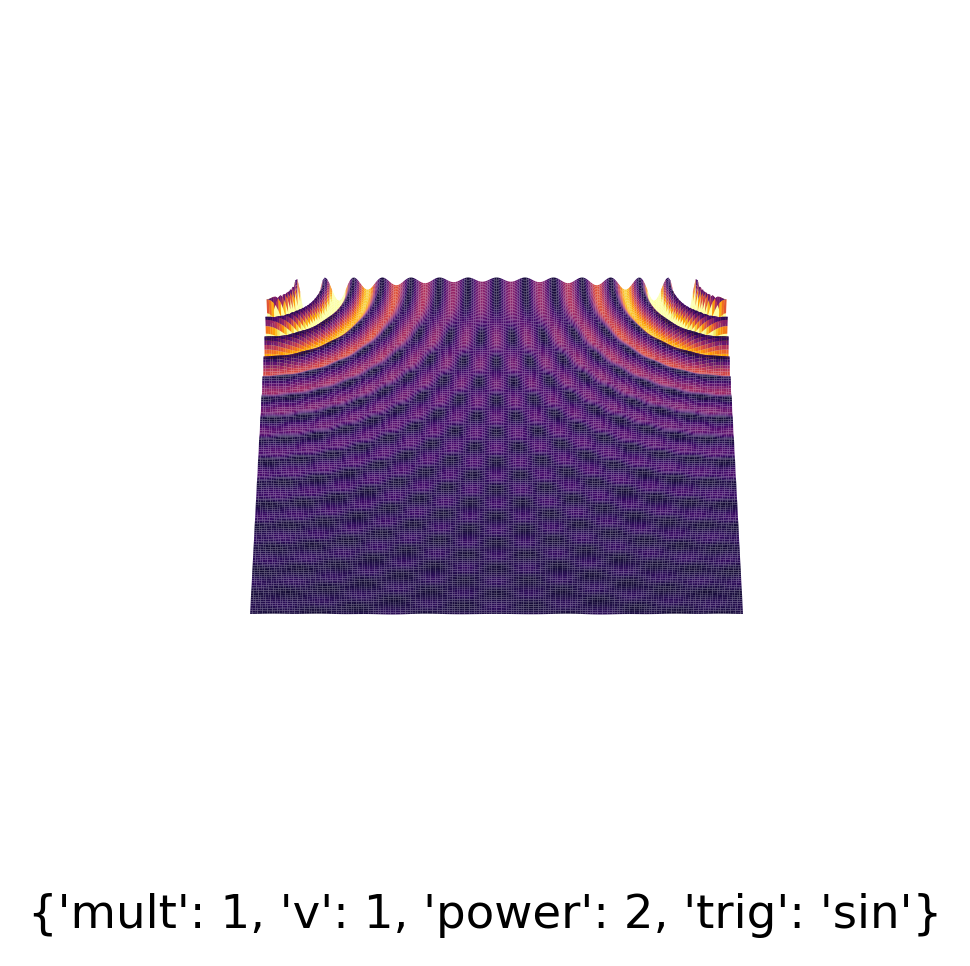

In [3]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], 
                              cmap='inferno_r', vmin=vmin, vmax=vmax, 
                              alpha=1, linewidth=0.1, edgecolors='black')
    
fig = plt.figure(dpi=140)
ax = fig.add_subplot(111, projection='3d')


plot = [ax.plot_surface(X, Y, zarray[:,:,0], rstride=1, cstride=1,  
                        cmap='inferno_r', vmin=vmin, vmax=vmax, 
                        alpha=1, linewidth=0.0, edgecolors='black')]
# plt.axis('equal')
plt.axis('off')
ax.set_zlim(-0.1,0.1)
ax.set_title(param, y=-0.1);
ax.view_init(45, 90)
ani = animation.FuncAnimation(fig, update_plot, frame_number, fargs=(zarray, plot), interval=1000/fps)

In [4]:
fn = 'grav_field_' + time.ctime()
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps) # SAVE AS MP4
# ani.save(fn+'.gif',writer='imagemagick',fps=fps) # SAVE AS GIF
plt.rcParams['animation.html'] = 'html5'

/home/fsx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  """
/home/fsx/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/fsx/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [10]:
# THE CELL ABOVE STARTS ANIMATING
ani = animation.FuncAnimation(fig, update_plot, frame_number, fargs=(zarray, plot), interval=1000/fps)

In [11]:
Z = f(X, Y, 3)
Z[Z < -0.1] = np.nan
zlim = 1

/home/fsx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/fsx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply
/home/fsx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(-1, 1)

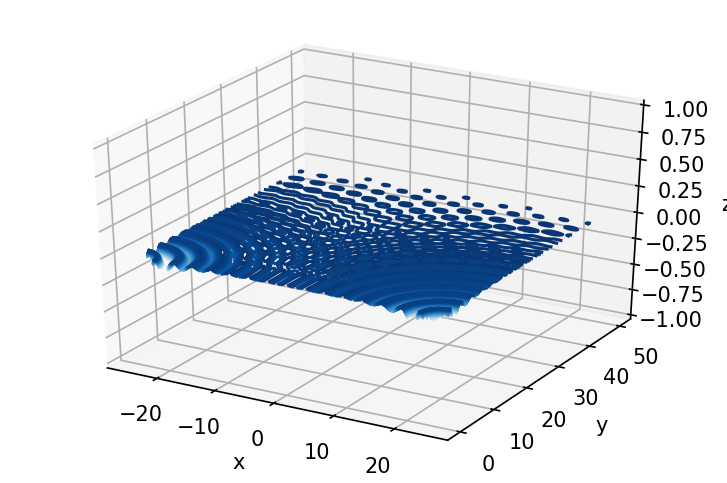

In [12]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='Blues')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_zlim(-zlim, zlim)

(-1, 1)

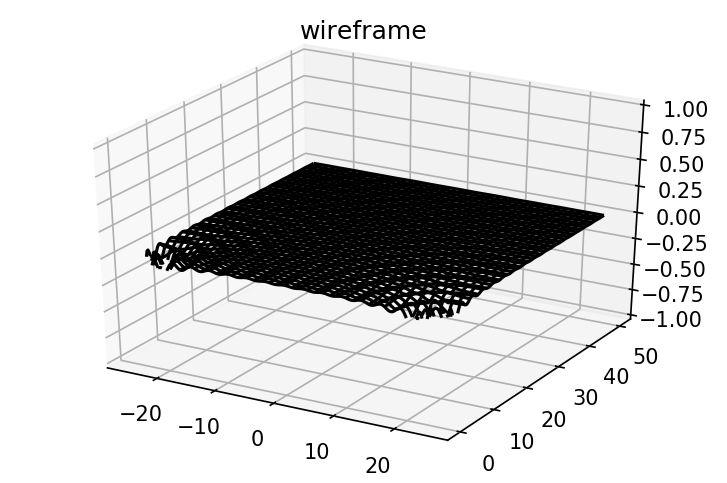

In [13]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');
ax.set_zlim(-zlim, zlim)

NameError: name 'zlim' is not defined

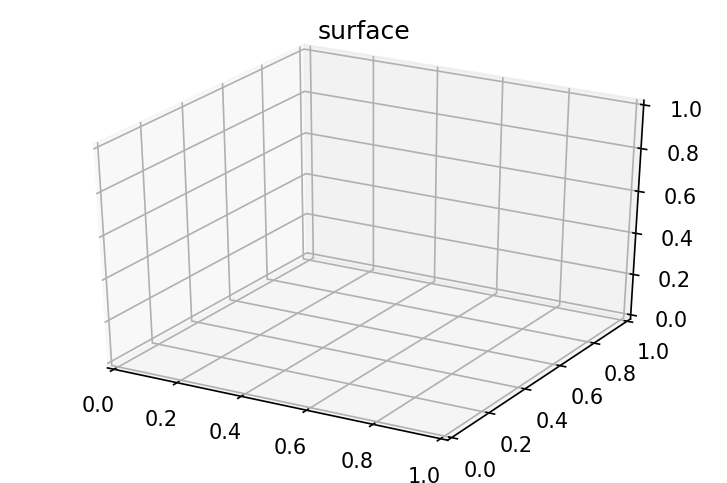

In [7]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')

ax.set_title('surface');
ax.set_zlim(-zlim, zlim)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno_r', vmin=-0.05, vmax=0.00, alpha=1)

In [ ]:
fig = plt.figure(dpi=150)

# r = np.linspace(0, 6, 20)
# theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
# r, theta = np.meshgrid(r, theta)

# X = r * np.sin(theta)
# Y = r * np.cos(theta)
# Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.set_zlim(-zlim, zlim)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

In [16]:
N = 200 # Meshsize
fps = 10 # frame per sec
frn = 50 # frame number of the animation

x = np.linspace(-4,4,N+1)
x, y = np.meshgrid(x, x)
zarray = np.zeros((N+1, N+1, frn))

for i in range(frn):
    zarray[:,:,i] = f(X,Y,t=i)

/home/fsx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/fsx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply


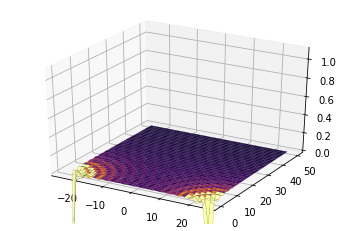

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, frame_number, fargs=(zarray, plot), interval=1000/fps)

In [ ]:
def createParallelepiped(x=0, y=0, z=0, width=1, height=1, length=1):
    
    x_, y_, z_ = x, y, z
    width, height, length = width, height, length
    
    coordinates = {
        'x': [width, height, length, y_, z_, x_],
        'y': [length, height, width, x_, z_, y_],
        'z': [length, width, height, x_, y_, z_]
    }

    for i in coordinates:
        x, y = coordinates[i][3], coordinates[i][4]
        side = Rectangle((x, y), coordinates[i][0], coordinates[i][1])
        ax.add_patch(side)
        art3d.pathpatch_2d_to_3d(side, z=coordinates[i][5], zdir=i)

        side = Rectangle((x, y), coordinates[i][0], coordinates[i][1])
        ax.add_patch(side)
        art3d.pathpatch_2d_to_3d(side, z=coordinates[i][5]+coordinates[i][2], zdir=i)